<a href="https://colab.research.google.com/github/mredelis/COT4500-Num-Calc-Spr23/blob/main/COT4500_NumCalc_FinalExam_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COT 4500 Numerical Calculus. Final Exam Review** ##


In [ ]:
import numpy as np
from decimal import Decimal, getcontext
from numpy.linalg import eig

### **Chapter 1: Calculus Review and Error Analysis**

1. Use double precision, calculate the resulting values (format to 5 decimal places)

> 010000000111111010111001



In [ ]:
EXPONENT_LENGTH = 11
MANTISSA_LENGTH = 52
MAX_ITERATIONS = 100

# Calculate decimal number using double precision (format to 5 decimal places)
def exercise_1(b_num: str):
    sign: int = 1 if b_num[0] == "0" else -1  # s = 0 the number is +
    exponent: float = 0
    mantissa: float = 0
    decimal_number: float = 0

    for i in range(1, EXPONENT_LENGTH + 1):
        exponent += int(b_num[i]) * (2 ** (11 - i))

    for i in range(EXPONENT_LENGTH + 1, len(b_num)):
        mantissa += int(b_num[i]) * (1 / 2) ** (i - 11)

    decimal_number = sign * (2 ** (exponent - 1023)) * (1 + mantissa)
    return decimal_number

binary_number = "010000000111111010111001"
res1 = exercise_1(binary_number)
print(res1)

491.5625


2. Repeat exercise 1 using three-digit chopping arithmetic

In [ ]:
def normalized_form(dec_num: float):
    n: int = 0
    # write number in normalized decimal form
    while dec_num >= 1:
        dec_num = dec_num / 10
        n += 1
    return (dec_num, n)

# Repeat Ex 1 using three-digit chopping arithmetic
def exercise_2(fraction: float, exponent: int, digits_to_chopping: int):
    chopped_value = int(fraction * 10**digits_to_chopping) / 10**digits_to_chopping
    return chopped_value * 10**exponent


(fraction, exponent) = normalized_form(res1)
res2 = exercise_2(fraction, exponent, 3)
print(res2)

491.0


3. Repeat exercise 1 using three-digit rounding arithmetic

In [ ]:
# Repeat Ex 1 using three-digit rounding arithmetic
def exercise_3(fraction: float, exponent: int, digits_to_rounding: int):
    # add 5 to the (k+1) digit
    new_fraction = fraction + 5 / 10 ** (digits_to_rounding + 1)
    # then chop after the kth digit
    return exercise_2(new_fraction, exponent, digits_to_rounding)

res3 = exercise_3(fraction, exponent, 3)
print(res3)


492.0


4. Compute the **absolute and relative error** with the exact value from question 1 and its 3 digit rounding

In [ ]:
# Absolute error with the exact value from question 1 and its 3 digit rounding
def absolute_error(precise: float, approximate: float):
    # sub_operation = precise - approximate
    sub_operation = approximate - precise
    print(f"Absulute error: {abs(sub_operation)}")


# Relative error with the exact value from question 1 and its 3 digit rounding
def relative_error(precise: float, approximate: float):
    # print(getcontext())
    if precise != 0:
        rel_err = abs(Decimal(precise) - Decimal(approximate)) / abs(Decimal(precise))
        print(f"Relative error: {rel_err}")


absolute_error(res1, res3)
relative_error(res1, res3)

Absulute error: 0.4375
Relative error: 0.0008900190718372536554354736173


### **Chapter 2: Solutions of Equations in One variable**

In class code & assignment 1:
- babylonian_method (this method is it only finds sqrt(2)...how can we find a zero of any function?)
- bisection_method (gives us the first zero of any function to a certain error
threshold)
- newton_raphson.py


5. What is the minimum number of terms needed to computer f(1) with error < 10<sup>-4<sup>
<br>
![series.JPG]()

In [ ]:
# Minimum number of terms needed to computer f(1) with error < 10^-4?
def check_for_alternating(series: str) -> bool:
    # check for (-1)^k term
    if "-1**k" in series:
        return True
    return False


def check_for_decreasing(series: str, x: int):
    k = 1
    previous_term = abs(eval(series))

    for k in range(2, 100):
        next_term = abs(eval(series))
        if previous_term <= next_term:
            return False
        previous_term = next_term
    return True


def compute_minimun_terms(error: float) -> int:
    min_number_terms = 0
    while (min_number_terms + 1) ** 3 < (1 / error):
        min_number_terms += 1
    print("Minimun number of terms: ", min_number_terms)


series: str = "(-1**k) * (x**k) / (k**3)"
x: int = 1
error: float = 10 ** (-4)
check1: bool = check_for_alternating(series)
check2: bool = check_for_decreasing(series, x)
if check1 and check2:
    compute_minimun_terms(error)

Minimun number of terms:  21


6. Determine the number of iterations necessary to solve f(x) = x^3 + 4x^2 – 10 = 0 with accuracy 10-4 using a = -4 and b = 7 using the **bisection method**

In [ ]:
# Bisection method finds the first zero of any function to a certain error threshold
MAX_ITERATIONS = 100

def bisection_method(left: float, right: float, tolerance: float, given_function: str):
    # Check f(a) and f(b) have different signs
    x = left
    intial_left = eval(given_function)
    print("intial_left: ", intial_left)

    print()

    x = right
    intial_right = eval(given_function)
    print("intial_right: ", intial_right)

    if intial_left * intial_right >= 0:
        print("Invalid inputs. Not on opposite sides of the function")
        return

    i = 0  # iteration counter
    while abs(right - left) > tolerance and i <= MAX_ITERATIONS:
        i += 1
        print("iteration: ", i)


        mid_point = (left + right) / 2
        x = mid_point
        evaluated_midpoint = eval(given_function)
        print("evaluated midpoint:", evaluated_midpoint)
        print("x:", x)

        if evaluated_midpoint == 0.0:
          print("Here")
          print(evaluated_midpoint)
          break

        # find function(left)
        x = left
        evaluated_left_point = eval(given_function)

        # this section basically checks if we have crossed the origin point (another way
        # to describe this is if f(midpoint) * f(left_point) changed signs)
        first_conditional: bool = evaluated_left_point < 0 and evaluated_midpoint > 0
        second_conditional: bool = evaluated_left_point > 0 and evaluated_midpoint < 0

        if first_conditional or second_conditional:
            right = mid_point
        else:
            left = mid_point

    print(i)


left = 0
right = 3
error_tolerance: float = 0.0001
function_string = "x**3 - 4*(x**2) + 5*x - 2"

bisection_method(left, right, error_tolerance, function_string)

intial_left:  -2

intial_right:  4
iteration:  1
evaluated midpoint: -0.125
x: 1.5
iteration:  2
evaluated midpoint: 0.390625
x: 2.25
iteration:  3
evaluated midpoint: -0.095703125
x: 1.875
iteration:  4
evaluated midpoint: 0.070556640625
x: 2.0625
iteration:  5
evaluated midpoint: -0.029327392578125
x: 1.96875
iteration:  6
evaluated midpoint: 0.016117095947265625
x: 2.015625
iteration:  7
evaluated midpoint: -0.007690906524658203
x: 1.9921875
iteration:  8
evaluated midpoint: 0.003936827182769775
x: 2.00390625
iteration:  9
evaluated midpoint: -0.001945503056049347
x: 1.998046875
iteration:  10
evaluated midpoint: 0.0009784707799553871
x: 2.0009765625
iteration:  11
evaluated midpoint: -0.0004878045292571187
x: 1.99951171875
iteration:  12
evaluated midpoint: 0.000244259848841466
x: 2.000244140625
iteration:  13
evaluated midpoint: -0.00012204051199660171
x: 1.9998779296875
iteration:  14
evaluated midpoint: 6.10426070579706e-05
x: 2.00006103515625
iteration:  15
evaluated midpoint: 

#### Newton's (or Newton-Raphson) method

7. Determine the number of iterations necessary to solve f(x) = x^3 - x^2 + 2 = 0 using **newton-raphson from the left side**

- Tolerance: 1e-6
- Initial guess: 0.5

In [ ]:
# The objective is to find a solution to f(x)=0 given an initial approximation p0
MAX_ITERATIONS = 1000

def newton_raphson(function_str: str, function_str_derivative: str, error_tolerance: float, initial_approximation: float):

  i = 1
  while i <= MAX_ITERATIONS:
    x = initial_approximation

    if eval(function_str_derivative) != 0:
      next_approximation = initial_approximation - eval(function_str) / eval(function_str_derivative)
      # i += 1 #to match the professor's answer even though i should be updated when it's commented out

      if abs(next_approximation - initial_approximation) < error_tolerance:
        print(i)
        return  # procedure was successfull

      i += 1 # As it should be
      initial_approximation = next_approximation
    else:
        print("Error derivative is zero")
        return

  
  print(f"The method failed after {MAX_ITERATIONS} number of iterations")

# set up
# function_str = "x**3 - (x**2) + 2"
# function_str_derivative = "3*x**2 - 2*x"
# error_tolerance: float = 10 ** (-4)
# initial_approximation = 0.5

# Quiz 1
function_str = "x**3 - (x**2) + 4"
function_str_derivative = "3*x**2 - 2*x"
error_tolerance: float = 0.001
initial_approximation = 1

newton_raphson(function_str, function_str_derivative, error_tolerance, initial_approximation)

6


### **Chapter 3: Interpolation and Polynomial Approximation**

In class code & assignment 2:
- **neville_method**
- newton forward
- hermite
- cubic spline


1. Using **Neville’s method**, find the 2nd degree interpolating value for f(3.7) for the following set of data

x       |	f(x) |	
--------|------|
3.3	    | 1.675|	   
3.8	    | 1.436|
3.9     |	1.318|

In [ ]:
def nevilles_method(x_points, y_points, x):
    # must specify the matrix size (this is based on how many columns/rows you want)
    matrix = np.zeros((len(x_points), len(x_points)))

    # fill in value (just the y values because we already have x set)
    for counter, row in enumerate(matrix):
        row[0] = y_points[counter]

    # the end of the first loop are how many columns you have...
    num_of_points = len(x_points) - 1

    # populate final matrix (this is the iterative version of the recursion explained in class)
    # the end of the second loop is based on the first loop...
    for i in range(1, num_of_points + 1):
        for j in range(1, i + 1):
            first_multiplication = (x - x_points[i - j]) * matrix[i][j - 1]
            second_multiplication = (x - x_points[i]) * matrix[i - 1][j - 1]

            denominator = x_points[i] - x_points[i - j]

            # this is the value that we will find in the matrix
            coefficient = (first_multiplication - second_multiplication) / denominator
            # print("Coefficient", coefficient)
            matrix[i][j] = coefficient

    print(matrix[i][j])
    return None

    
x_points = [3.6, 3.8, 3.9]
y_points = [1.675, 1.436, 1.318]
approximating_value = 3.7
nevilles_method(x_points, y_points, approximating_value)

1.5549999999999995


#### Newton's forward difference

2. Using **Newton’s forward method**, print out the polynomial approximations for degrees 1, 2, and 3 using the following set of data

a. Hint, create the table first

x       |	f(x)    |	
--------|---------|
7.2	    | 23.5492 |	   
7.4	    | 25.3913 |
7.5     |	26.8224 |
7.5     |	27.4589 |

3. Using the results from 3, approximate f(7.3)?

In [ ]:
def divided_difference_table(x_points, y_points):
    # set up the matrix
    size: int = len(x_points)
    matrix: np.array = np.zeros((size, size))

    # fill the matrix
    for index, row in enumerate(matrix):
        row[0] = y_points[index]

    # populate the matrix (end points are based on matrix size and max operations we're using)
    for i in range(1, size):
        for j in range(1, i + 1):
            numerator = matrix[i][j - 1] - matrix[i - 1][j - 1]
            denominator = x_points[i] - x_points[i - j]

            operation = numerator / denominator

            # cut it off to view it more simpler
            # matrix[i][j] = "{0:.7g}".format(operation)
            matrix[i][j] = operation

    # Print diagonal
    diagonal = []
    for i in range(1, size):
        diagonal.append(matrix[i][i])

    print("Diagonal of the matrix: ", diagonal)

    return matrix


def get_approximate_result(matrix, x_points, value):
    # p0 is always y0 and we use a reoccuring x to avoid having to recalculate x
    reoccuring_x_span = 1
    reoccuring_px_result = matrix[0][0]

    # we only need the diagonals...and that starts at the first row...
    for index in range(1, len(x_points)):
        polynomial_coefficient = matrix[index][index]

        # we use the previous index for x_points....
        reoccuring_x_span *= value - x_points[index - 1]

        # get a_of_x * the x_span
        mult_operation = polynomial_coefficient * reoccuring_x_span

        # add the reoccuring px result
        reoccuring_px_result += mult_operation

    # final result
    print(f"\n{reoccuring_px_result}")
    return reoccuring_px_result

xi = [7.2, 7.4, 7.5, 7.6]
fxi = [23.5492, 25.3913, 26.8224, 27.4589]
divided_table = divided_difference_table(xi, fxi)

approximating_x = 7.3
final_approximation = get_approximate_result(divided_table, xi, approximating_x)

Diagonal of the matrix:  [9.210500000000001, 17.00166666666675, -141.82916666666722]

24.016574999999992


#### Hermite interpolation

4. Using the **divided difference method**, print out the **Hermite polynomial approximation matrix**

x     |	f(x) |	f’(x)  |
------|------|---------|
0	    | 1	   | 1.06    |
1	    | 2	   | 1.23    |
2     |	4	   | 1.55    |


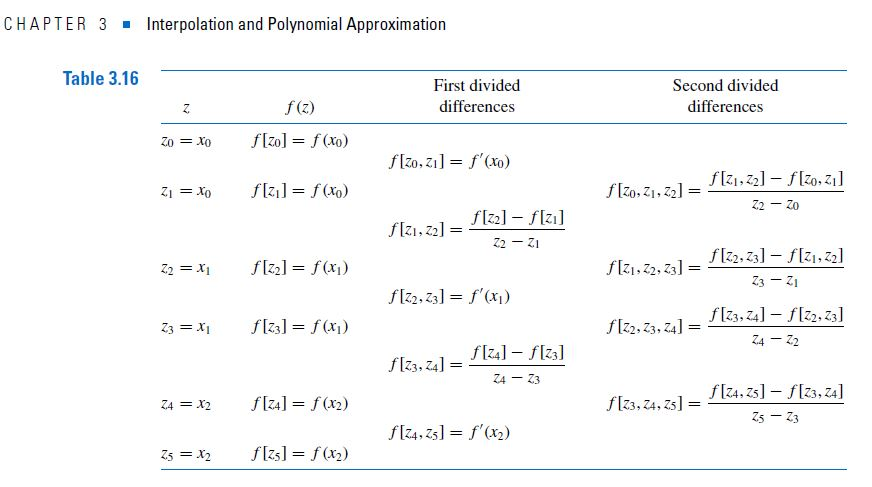

In [ ]:
def hermite_interpolation(x_points, y_points, slopes):
    # matrix size changes because of "doubling" up info for hermite
    num_of_points = len(x_points)
    matrix = np.zeros((num_of_points * 2, num_of_points * 2))

    # populate x values (make sure to fill every TWO rows)
    for x in range(0, num_of_points * 2, 2):
        matrix[x][0] = x_points[int(x / 2)]
        matrix[x + 1][0] = x_points[int(x / 2)]
        # break

    # prepopulate y values (make sure to fill every TWO rows)
    for x in range(0, num_of_points * 2, 2):
        matrix[x][1] = y_points[int(x / 2)]
        matrix[x + 1][1] = y_points[int(x / 2)]

    # prepopulate with derivates (make sure to fill every TWO rows. starting row CHANGES.)
    for x in range(1, num_of_points * 2, 2):
        matrix[x][2] = slopes[int(x / 2)]

    filled_matrix = apply_div_dif(matrix)
    print(f"\n{filled_matrix}")


def apply_div_dif(matrix: np.array):
    size = len(matrix)

    for i in range(2, size):
        for j in range(2, i + 2):
            # skip if value is prefilled (we dont want to accidentally recalculate...)
            if j >= len(matrix[i]) or matrix[i][j] != 0:
                continue

            # get left cell entry
            left: float = matrix[i][j - 1]

            # get diagonal left entry
            diagonal_left: float = matrix[i - 1][j - 1]

            # order of numerator is SPECIFIC.
            numerator: float = left - diagonal_left

            # denominator is current i's x_val minus the starting i's x_val....
            denominator = matrix[i][0] - matrix[i - j + 1][0]

            # something save into matrix
            operation = numerator / denominator
            matrix[i][j] = operation

    return matrix

# xi_points = [0, 1, 2]
# yi_points = [1, 2, 4]
# slopes = [1.06, 1.23, 1.55]

# Quiz 2
xi_points = [2.1, 2.5, 2.6]
yi_points = [5.456, 6.298, 6.427]
slopes = [.862, 1.489, 1.743]

hermite_interpolation(xi_points, yi_points, slopes)


[[  2.1       5.456     0.        0.        0.        0.     ]
 [  2.1       5.456     0.862     0.        0.        0.     ]
 [  2.5       6.298     2.105     3.1075    0.        0.     ]
 [  2.5       6.298     1.489    -1.54    -11.61875   0.     ]
 [  2.6       6.427     1.29     -1.99     -0.9      21.4375 ]
 [  2.6       6.427     1.743     4.53     65.2     132.2    ]]


5. Using **cubic spline interpolation**, solve for the following using this set of data:

x     |	f(x) |	
------|------|
2	    | 3    |	   
5	    | 5    |
8     |	7    |
10    |	9    |

- Find matrix A
- Vector b
- Vector x

In [ ]:
def create_matrix_A(x_points):
    n: int = len(x_points)

    matrix_main_diagonal = np.identity(n)

    h = []
    for i in range(n - 1):
        h.append(x_points[i + 1] - x_points[i])

    # Fill in diagonal
    for i in range(1, n - 1):
        for j in range(1, n):
            if i == j:
                matrix_main_diagonal[i][j] = 2 * (h[i] + h[i - 1])

    below_diagonal = h.copy()
    above_diagonal = h.copy()

    # Replace last element of below_diagonal with 0
    below_diagonal[-1] = 0

    # Replace first element of above_diagonal with 0
    above_diagonal[0] = 0

    matrix_below = np.diagflat(below_diagonal, -1)
    matrix_above = np.diagflat(above_diagonal, 1)

    matrix = matrix_main_diagonal + matrix_below + matrix_above
    print(f"\n{matrix}")

    return h, matrix


def create_vector_b(y_points, h_list):
    # This not necessary but to keep consistency with textbook variables
    a_list = y_points.copy()

    n = len(y_points)

    alpha = np.zeros(n)
    for i in range(1, n - 1):
        alpha[i] = 3 / h_list[i] * (a_list[i + 1] - a_list[i]) - 3 / h_list[i - 1] * (a_list[i] - a_list[i - 1])

    print(f"\n{alpha}")

    return alpha


def create_x_vector(x_points, h_list, b_vector):
    # Step 3 page 150
    n = len(x_points)
    l = np.zeros(n)
    u = np.zeros(n)
    z = np.zeros(n)
    c = np.zeros(n)

    l[0] = 1
    # Not necessary u and z arrays are 0 on their first element
    # u[0] = 0
    # z[0] = 0

    # Step 4
    for i in range(1, n - 1):
        l[i] = 2 * (x_points[i + 1] - x_points[i - 1]) - (h_list[i - 1] * u[i - 1])
        u[i] = h_list[i] / l[i]
        z[i] = (b_vector[i] - h_list[i - 1] * z[i - 1]) / l[i]

    # Step 5
    l[n - 1] = 1
    z[n - 1] = 0
    c[n - 1] = 0

    for j in range(n - 2, 0, -1):
        c[j] = z[j] - u[j] * c[j + 1]

    print(f"\nc vector:\n{c}")

    return c


# xi_p = [2, 5, 8, 10]
# fxi_p = [3, 5, 7, 9]

# Quiz 2
xi_p = [0, 1, 2, 3]
fxi_p = [1, 2.718, 7.387, 20.079]

h_list, matrix_A = create_matrix_A(xi_p)
b_vector = create_vector_b(fxi_p, h_list)
x_vector = create_x_vector(xi_p, h_list, b_vector)


[[1. 0. 0. 0.]
 [1. 4. 1. 0.]
 [0. 1. 4. 1.]
 [0. 0. 0. 1.]]

[ 0.     8.853 24.069  0.   ]

c vector:
[0.     0.7562 5.8282 0.    ]


### **Chapter 4: Numerical Differentiation and Integration**

In class code:
- None


### **Chapter 5: IVP Problems for Differential Equations**

In class code & assingment 3:

- eulers and modified_eulers methods
- higher_order_taylor_methods (not here)
- runge-kutta is order 4
- midpoint_method (not here)


#### Euler's and modified euler's

1. The final value of the **euler's** and **modified euler's** method

- Function: y – t^3
- Initial point: .5  ( y(0) = 0.5 )
- Iterations: 100
- Range: 0 < t < 3


In [ ]:
def function(t: float, w: float): # y is replace with w
  # return w - np.power(t, 3)
  return t - w**2

def eulers():
  # Initial setup
  w = 2.5  # w0 = y(0) for this exercise the initial condition is y(0) = 0.5 = w0
  a, b = (-1, 4)  # t is in the interval [a, b]
  t = a
  N = 30  # number of iterations
  h = (b - a) / N  # step size

  for i in range(1, N + 1):
    w_next = w + h*function(t,w)
    t = i*h
    w=w_next
    # print(w_next)

  return w


def modified_eulers():
  # Initial setup
  w = 0.5  
  a, b = (0, 3)  # t is in the interval [a, b]
  N = 100  # number of iterations
  h = (b - a) / N  # step size

  for i in range(0, N):
    t = h*i
    w_next = w + h/2*(function(t,w) + function(h*(i+1), (w + h*function(t,w))))
    w=w_next

  return w


print("Euler's method: %.5f" % eulers())
print("Modified Euler's method: %.5f" % modified_eulers())

Euler's method: 2.18337
Modified Euler's method: 1.63240


2. **Runge-Kutta** with the following details:
- Function: t – y2
- Range: 0 < t < 2
- Iterations: 10
- Initial Point: f(0) = 1

In [ ]:
###### Runge-Kutta (method of order four) ######
def runge_kutta() -> float:

    # Initial setup
    w = 1  # w = α for this exercise the initial condition is y(a) = α
    a, b = (0, 2)  # t is in the interval [a, b]
    t = a
    N = 10  # number of iterations
    h = (b - a) / N  # step size

    for i in range(1, N + 1):
        prev_w = w
        prev_t = t

        # compute wi. Breakdown the solution below
        K1 = h * function(prev_t, prev_w)
        K2 = h * function((prev_t + h / 2), (prev_w + K1 / 2))
        K3 = h * function((prev_t + h / 2), (prev_w + K2 / 2))
        K4 = h * function((prev_t + h), (prev_w + K3))
        w = prev_w + (K1 + 2 * K2 + 2 * K3 + K4) / 6

        # compute ti
        t = a + i * h

    return w

approximate_rungeKutta_solution = runge_kutta()
print("Approximate Runge-Kutta solution: %.5f" % approximate_rungeKutta_solution)

Approximate Runge-Kutta solution: 1.05481


### **Chapter 6: Solving linear systems**

* 6.1 Direct methos for solving linear systems
  * Row operations (technique)
    * Interchange two rows
    * Multiply a row by a non-zero constant
    * Add a multiple of one row to another row
  * Gaussian Elimination (Backwards Substitution) -> assignment
  * Gauss-Jordan -> in class
* 6.2 Pivoting Strategies
  * Partial Pivoting
  * Complete Pivoting
  * Scaled-column pivoting
* 6.3/6.4 Matrix Operations
  * Inverse
  * Determinant
  * Multiplication
* 6.5 Matrix Factorization
  * LU Decomposition
  * Permutation matrix
* 6.6 More matrices and LDL factorization
  * Diagonally Dominant: matrix A is said to be diagonally dominant if the absolute value of each diagonal element is greater than or equal to the sum of the absolute values of the other elements in the same row
  * Positive Definite: Property


In class code and assignment 3:
- gauss_jordan.py
- gauss elimination and backward substitution
- row_operations.py
- pivoting_strategies.py

#### Row operations

In [ ]:
def row_operations():
  # Define the matrix
  A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
  # Print the original matrix
  print("Original matrix:\n", A)
  # Perform row operations
  # a[0] = [1, 2, 3] -> 4a[0] = [4,8,12] -> [4, 5, 6] - [4,8,12]
  # 4 - 4 = 0
  # 5 - 8 = -3
  # 6 - 12 = -6
  A[1] = A[1] - 4 * A[0]
  A[2] = A[2] - 7 * A[0]
  A[2] = A[2] - 2 * A[1]

  # Print the matrix after row operations
  print("Matrix after row operations:\n", A)


row_operations()


Original matrix:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix after row operations:
 [[ 1  2  3]
 [ 0 -3 -6]
 [ 0  0  0]]


In [ ]:
def gauss_jordan(A, b):
  n = len(b)
  
  # Combine A and b into augmented matrix
  Ab = np.concatenate((A, b.reshape(n,1)), axis=1)
    
  # Perform elimination
  for i in range(n):
    # Find pivot row
    max_row = i
    for j in range(i+1, n):
        if abs(Ab[j,i]) > abs(Ab[max_row,i]):
            max_row = j
    
    # Swap rows to bring pivot element to diagonal
    Ab[[i,max_row], :] = Ab[[max_row,i], :] # operation 1 of row operations
    
    # Divide pivot row by pivot element
    pivot = Ab[i,i]
    Ab[i,:] = Ab[i,:] / pivot
    
    # Eliminate entries below pivot
    for j in range(i+1, n):
        factor = Ab[j,i]
        Ab[j,:] -= factor * Ab[i,:] # operation 2 of row operations
  
  # Perform back-substitution
  for i in range(n-1, -1, -1):
      for j in range(i-1, -1, -1):
          factor = Ab[j,i]
          Ab[j,:] -= factor * Ab[i,:]
  
  # Extract solution vector x
  x = Ab[:,n]
  
  return x

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

x = gauss_jordan(A, b)
print(x)

[ 9223372036854775806                    2 -9223372036854775808]


<ipython-input-7-7f37c130f0f5>:20: RuntimeWarning: divide by zero encountered in true_divide
  Ab[i,:] = Ab[i,:] / pivot
<ipython-input-7-7f37c130f0f5>:20: RuntimeWarning: invalid value encountered in true_divide
  Ab[i,:] = Ab[i,:] / pivot


3. Use **Gaussian elimination and backward substitution** solve the following linear system of equations written in augmented matrix format.

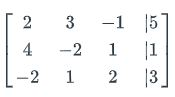

In [ ]:
###### Gaussian elimination and backward substitution ######
# Solve a linear system of equations written in augmented matrix format.
def gaussian_elimination(A: np.array, b: np.array):
    n = len(b)

    # Combine A and b into augmented matrix
    Ab = np.concatenate((A, b.reshape(n, 1)), axis=1)

    # numpy array of n size and initializing to zero for storing solution vector
    x = np.zeros(n)

    # Perform elimination
    for i in range(n):
        # Find pivot row to move the entry with largest abs value to the pivot position
        max_row = i

        for j in range(i + 1, n):
            if abs(Ab[j, i]) > abs(Ab[max_row, i]):
                max_row = j

        # Swap rows to bring pivot element to diagonal
        # Selects a submatrix consisting of all rows i to max_row
        Ab[[i, max_row], :] = Ab[[max_row, i], :]

        # Eliminate entries below pivot
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, :] = Ab[j, :] - factor * Ab[i, :]

        if Ab[n - 1, n - 1] == 0:
            print("No unique solution exists")
            return

    # Start backward substitution
    x[n - 1] = Ab[n - 1, n] / Ab[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        x[i] = Ab[i][n]
        for j in range(i + 1, n):
            x[i] = x[i] - Ab[i][j] * x[j]

        x[i] = x[i] / Ab[i][i]

    return x


# A = np.array([[2, 3, -1], [4, -2, 1], [-2, 1, 2]], dtype=np.double)
# b = np.array([5, 1, 3])  # b is a row vector but it should be a column vector

A = np.array([[1,1,1], [2,3,4], [4,5,6]], dtype=np.double)
b = np.array([6,20,33])  # b is a row vector but it should be a column vector

x = gaussian_elimination(A, b)
print(f"{x}\n")

No unique solution exists
None



#### LU Decomposition

4. Implement **LU Factorization** for the following matrix and do the following:
- Print out the matrix determinant.
- Print out the L matrix.
- Print out the U matrix.

In [ ]:
def LU_factorization(mat: np.array):
    # matrix determinant. It has to be a square matrix. Non-square matrix does not have det
    det = np.linalg.det(mat)
    print("Matrix determinant: %.5f" % det)
    print()

    # print(np.shape(mat)) # gives (rows, columns)
    # print(len(mat)) # gives the number of rows same as mat.shape[0]
    n = len(mat)

    # Initialize U to an identity matrix of dimension n x n
    U = np.identity(n)
    # Initialize L = A
    L = mat.copy()

    # Find L and U matrices
    for i in range(n):
        for j in range(i + 1, n):
            if L[i, i] != 0:  # check for div by 0 error
                factor = L[j, i] / L[i, i]
                U[j, i] = factor
                L[j, :] = L[j, :] - factor * L[i, :]
            else:
                print("Division by 0 error!")
                return

    print("U matrix: \n", U)
    print()
    print("L matrix: \n", L)


mat = np.array([[1, 1, 0, 3], [2, 1, -1, 1], [3, -1, -1, 2], [-1, 2, 3, -1]], dtype=np.float64)
LU_factorization(mat)

Matrix determinant: 39.00000

U matrix: 
 [[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [ 3.  4.  1.  0.]
 [-1. -3.  0.  1.]]

L matrix: 
 [[  1.   1.   0.   3.]
 [  0.  -1.  -1.  -5.]
 [  0.   0.   3.  13.]
 [  0.   0.   0. -13.]]


#### Diagonally Dominant Matrix

Determine if the following matrix is diagonally dominate. A matrix is **diagonally dominant**, meaning that the absolute value of the diagonal element in each row is greater than the sum of the absolute values of the other elements in that row.

In [ ]:
def diagonally_dominant_matrix(A: np.array):
    # check if matrix A is square n x n
    (row, column) = np.shape(A)
    if row != column:
        print("Matrix must be of type nxn (square matrix)")
        return False

    # traverse the rows
    for i in range(row):
        sum = 0
        # traverse columns and find the sum of each row
        for j in range(column):
            sum += abs(A[i, j])

        # removing diagonal element
        sum = sum - abs(A[i, i])

        # checking if diagonal element is less than sum of non-diagonal element.
        if abs(A[i, i]) < sum:
            return False

    return True

matrix = np.array(
    [
        [9, 0, 5, 2, 1],
        [3, 9, 1, 2, 1],
        [0, 1, 7, 2, 3],
        [4, 2, 3, 12, 2],
        [3, 2, 4, 0, 8],
    ]
)
print(diagonally_dominant_matrix(matrix))


False


#### Positive Definite Matrix

Determine if the matrix is a **positive definite**

In [ ]:
###### Find if a matrix is positive definite ######
# if it is symmetric and all its eigenvalues λ are positive, that is λ > 0

def is_Symmetric(A: np.array) -> bool:
    # Transpose the matrix
    B = A.transpose()
    # check if both the arrays are of equal size
    if A.shape == B.shape:
        # comparing the arrays using == and all() method
        if (A == B).all():
            return True
        else:
            return False
    else:
        return False


def positive_eigenvalues(A: np.array) -> bool:
    # w are eigen values and v are eigen vectors
    w, v = eig(A)
    return all(i > 0 for i in w)


def positive_definite_matrix(A: np.array):
    return is_Symmetric(A) and positive_eigenvalues(A)


mat = np.array([[2, 2, 1], [2, 3, 0], [1, 0, 2]])
print(positive_definite_matrix(mat))

True


### **Chapter 7: Iterative Techniques for Matrices**

* 7.1/7.2 Matrices and Eigens
* 7.3 Iterative Methods: Solve a system of equations using an iterative method such as the **Jacobi or Gauss-Seidel** methods.
* 7.4 **Relaxation techniques**: residual vectors and over-relaxation (modification to Gauss-Seidel method)
* 7.5 Error Bounds and Iterative Refinement

In class code & bonus assignment:
- Jacobi Method
- Gauss-Seidel Method
- Relaxation Techniques

In [ ]:
# Jacobi and Gauss-Seidel methods require a diagonally dominant matrix
def make_diagonally_dominant(A, b):
  n = len(A)

  # traverse the rows and find the sum of its elements
  for i in range(n):
    sum = np.sum(abs(A[i, :]))
    pivot = A[i, i]
    # removing diagonal element
    sum = sum - abs(pivot)

    # checking if diagonal element is less than sum of non-diagonal element.
    if abs(pivot) > sum:
        continue

    # if we reach this point, this means we need to swap AT LEAST ONCE
    max_value_of_row = 0
    max_index_in_row = 0
    for j in range(n):
      current_value_in_row = abs(A[i, j])
      if current_value_in_row > max_value_of_row:
        max_value_of_row = current_value_in_row
        max_index_in_row = j

    # now that we have a new "pivot", we swap cur_row with the expected index
    A[[i, max_index_in_row]] = A[[max_index_in_row, i]]
    b[[i, max_index_in_row]] = b[[max_index_in_row, i]]

  return A, b

#### Gauss-seidel method

1. The number of iterations it takes **gauss-seidel** to converge:
- Initial guess: [0, 0, 0]
- Tolerance: 1e-6
- Iterations: 50
-
3	1	1	1<br>
1	4	1	3<br>
2	3	7	0<br>

This method is an improvement to jacobi. It uses a different formula to calculate xi

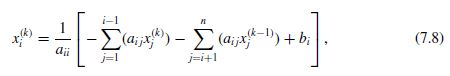

In [ ]:
def gauss_seidel(matrix, b, x0, tolerance, iterations):

  n = len(matrix)
  x = np.copy(x0)
  x_new = np.zeros(n)

  k = 1
  while k < iterations:
    for i in range(n):
      # covers sum before pivot element to multiply with calculated values of x from previous row
      s1 = np.dot(matrix[i, :i], x_new[:i])
      # covers sum after pivot element
      s2 = np.dot(matrix[i, i+1:], x[i+1:])

      # print(f"matrix[i, :i] = {matrix[i, :i]}")
      # print(f"matrix[i, i+1:] = {matrix[i, i+1:]}")


      x_new[i] = 1/matrix[i, i] * (b[i] - s1 - s2)  

    # one set of solutions
    if(np.linalg.norm(x_new - x) < tolerance):
      print("The procedure was successfull")
      return x_new, k

    x = np.copy(x_new)
    k += 1

  print("Maximum number of iterations exceeded")
  return -1


matrix = np.array([[3,1,1],[1,4,1],[2,3,7]])
b_vector = np.array([1,3,0])
x0 = np.array([0,0,0]) # initial guess
tolerance = 1e-6
iterations = 50

d_matrix, new_b = make_diagonally_dominant(matrix, b_vector)

solution, num_of_iter = gauss_seidel(d_matrix, new_b, x0, tolerance, iterations)
print(solution)
print(num_of_iter)



The procedure was successfull
[ 0.19999994  0.79999998 -0.39999997]
9


#### Jacobi

2. The number of iterations it takes **jacobi** method to converge
- Initial guess: [0, 0, 0]
- Tolerance: 1e-6
- Iterations: 50
-  
3 1 1 1<br>
1 4 1 3<br>
2 3 7 0<br>

The method converges to a solution if the matrix A is **diagonally dominant**, meaning that the absolute value of the diagonal element in each row is greater than the sum of the absolute values of the other elements in that row.

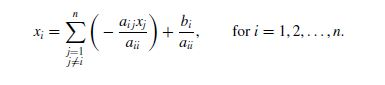

In [ ]:
def jacobi(matrix, b, x0, tolerance, iterations):
  # x_prev = np.copy(x0)
  x = np.zeros(len(b))

  k = 1
  while k < iterations:

    for i in range(len(b)):
      # dot product dot product A.B = a1b1 + a2 b2 + ... + an bn
      rows_sum = np.dot(matrix[i, :], x0)

      # less a_ii (pivot) * x_i
      rows_sum = rows_sum - (matrix[i, i] * x0[i])
      # Apply formula
      x[i] = 1/matrix[i, i] * (b[i] - rows_sum)
    
    # print(x)
    # one set of solutions
    if(np.linalg.norm(x - x0) < tolerance):
      print("The procedure was successfull")
      return x, k

    x0 = np.copy(x)
    k += 1

  print("Maximum number of iterations exceeded")
  return -1


matrix = np.array([[3,1,1],[1,4,1],[2,3,7]])
b_vector = np.array([1,3,0])
x0 = np.array([0,0,0]) # initial guess

# matrix = np.array([[8,1,-1],[2,1,9],[1,-7,2]])
# b_vector = np.array([8,12,-4])
# x0 = np.array([0,0,0]) # initial guess
tolerance = 1e-6
iterations = 50

d_matrix, new_b = make_diagonally_dominant(matrix, b_vector)

solution, num_of_iter = jacobi(d_matrix, new_b, x0, tolerance, iterations)
print(solution)
print(num_of_iter)


The procedure was successfull
[ 0.2000002  0.8000002 -0.3999998]
29


#### Relaxation techniques for solving linear systems

- under-relaxation: 0 < w < 1 
- over-relaxation: 1 < w
  - used to accelerate the convergence for systems that are convergent by the Gauss-Seidel technique.


In [ ]:
# global variables
tolerance = 1e-7
max_iterations = 1000

# Successive Over-Relaxation SOR
def sor_gauss_seidel(matrix: np.array, b_vector: np.array, w: float, ):
  # Set the initial guess for the solution vector x
  x0 = np.ones_like(b_vector, dtype=float)
  # print(x0)

  # Initialize the iteration counter and the error
  iteration = 0
  error = tolerance + 1

  # Perform the SOR Gauss-Seidel iteration until convergence or the maximum number of iterations is reached
  while error > tolerance and iteration < max_iterations:
    x = np.copy(x0)

    # get the new approximations
    for i in range(len(b_vector)):
      first_summation = np.dot(matrix[i, :i], x[:i])
      second_summation = np.dot(matrix[i, i + 1:], x0[i + 1:])
      right_hand_side = w * (b_vector[i] - first_summation - second_summation) / matrix[i, i]
      left_hand_side = (1 - w) * x0[i]
      x[i] = left_hand_side + right_hand_side

      # check the error
      # one set of solutions
    error = np.linalg.norm(x - x0)

    # rinse and repeat
    x0 = np.copy(x)
    iteration += 1

    # if we went through ALL iterations, it might've not converged...
    if iteration == max_iterations:
      iteration = -1

  return iteration


matrix = np.array([[4, 3, 0], [3, 4, -1], [0, -1, 4]])
b_vector = np.array([24, 30, -24])
value_for_w: float = 1.25
sor_gauss_seidel(matrix, b_vector, value_for_w)


15

### **Chapter 9: Eigenvalues and Power Method**

* 9.3 Power Method: The power method is an iterative algorithm used to find the dominant eigenvector and eigenvalue of a matrix. It is one of the most widely used methods for computing eigenvalues and eigenvectors in numerical linear algebra.

In class code: 
- None

#### Power method

From Chapter 9.3 Example

In [ ]:
import numpy as np
  
# Define the matrix A
A = np.array([[-2, -3], [6, 7]])
# print("Lenght of matrix: ", len(A))
  
# Choose the initial vector x
# x = np.array([[1, 2]]).T
# print(x)
x = np.ones([len(A), 1]) 

  
# Define the tolerance for the eigenvalue and eigenvector approximations
# (i.e. the maximum allowed difference between the approximations and the actual values)
tol = 1e-6
  
# Define the maximum number of iterations
max_iter = 100
  
# Define the variable lam_prev to store the
# previous approximation for the largest eigenvalue
lam_prev = 0
  
# Iteratively improve the approximations for the largest eigenvalue and eigenvector using the power method
for i in range(max_iter):
    # Compute the updated approximation for the eigenvector
    x = A @ x / np.linalg.norm(A @ x)
    # print(x)
  
    # Compute the updated approximation for the largest eigenvalue
    lam = (x.T @ A @ x) / (x.T @ x)
    print(lam)
    print()
  
    # Check if the approximations have converged
    if np.abs(lam - lam_prev) < tol:
      print("hello")
      print(lam)
      print(lam_prev)
      break
  
    # Store the current approximation for the largest eigenvalue
    lam_prev = lam
  
# Print the approximations for the largest eigenvalue and eigenvector
print(float(lam))
print(x)

[[4.83505155]]

[[4.1775537]]

[[4.04272045]]

[[4.01057992]]

[[4.00263878]]

[[4.00065931]]

[[4.0001648]]

[[4.0000412]]

[[4.0000103]]

[[4.00000257]]

[[4.00000064]]

[[4.00000016]]

hello
[[4.00000016]]
[[4.00000064]]
4.000000160932548
[[-0.44721358]
 [ 0.8944272 ]]
